In [7]:
from tensorflow.keras.datasets import mnist
from keras import layers,models

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = onehot.transform(y_test.reshape(-1,1)).toarray()

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1600,activation="relu"))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10,activation="softmax"))


model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(x_train,y_train,batch_size=32,epochs=15)

/home/lucas/Área de Trabalho/curso_tensorflow/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9226 - loss: 0.2842
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9824 - loss: 0.0738
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9865 - loss: 0.0512
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9896 - loss: 0.0372
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9920 - loss: 0.0289
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9925 - loss: 0.0303
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9946 - loss: 0.0216
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9949 - loss: 0.0208
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9954 - loss: 0.0176
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9964 - loss: 0.0150
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9963 - loss: 0.0160
Epoch 12

In [12]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9898 - loss: 0.0765


[0.05351037532091141, 0.9927999973297119]

In [14]:
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(0.5, 1.0, 'class[[7]]')

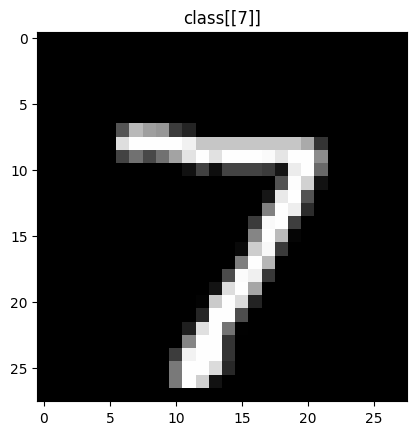

In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.imshow(x_test[0],cmap="gray")
plt.title("class"+ str(onehot.inverse_transform(predict[0].reshape(1,-1))))